In [1]:
%pip install --upgrade pip
%pip install numpy pandas matplotlib seaborn scikit-learn tensorflow==2.15.0 keras pillow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import keras

print("TensorFlow version:", getattr(tf, "__version__", " Not found"))
print("Keras version:", getattr(keras, "__version__", " Not found"))
print("TF file:", getattr(tf, "__file__", "No file"))


TensorFlow version: 2.15.0
Keras version: 2.15.0
TF file: C:\Users\Asus\Projects\AI_Project\venv\Lib\site-packages\tensorflow\__init__.py


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train)

In [6]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    epochs=12,
    validation_data=(x_test, y_test),
    verbose=1
)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/12
469/469 [==============================] - 33s 68ms/step - loss: 0.7703 - accuracy: 0.7153 - val_loss: 0.5189 - val_accuracy: 0.8062
Epoch 2/12
469/469 [==============================] - 32s 68ms/step - loss: 0.5746 - accuracy: 0.7856 - val_loss: 0.4552 - val_accuracy: 0.8286
Epoch 3/12
469/469 [==============================] - 33s 71ms/step - loss: 0.5175 - accuracy: 0.8050 - val_loss: 0.3983 - val_accuracy: 0.8566
Epoch 4/12
469/469 [==============================] - 33s 71ms/step - loss: 0.4804 - accuracy: 0.8203 - val_loss: 0.3784 - val_accuracy: 0.8614
Epoch 5/12
469/469 [==============================] - 35s 74ms/step - loss: 0.4556 - accuracy: 0.8281 - val_loss: 0.3591 - val_accuracy: 0.8692
Epoch 6/12
469/469 [==============================] - 37s 78ms/step - loss: 0.4325 - accuracy: 0.8386 - val_loss: 0.3610 - val_accuracy: 0.8600
Epoch 7/12
469/469 [==============================] - 37s 79ms/step - loss: 0.4184 - accuracy: 0.8424 - val_loss: 0.3313 - val_accuracy:

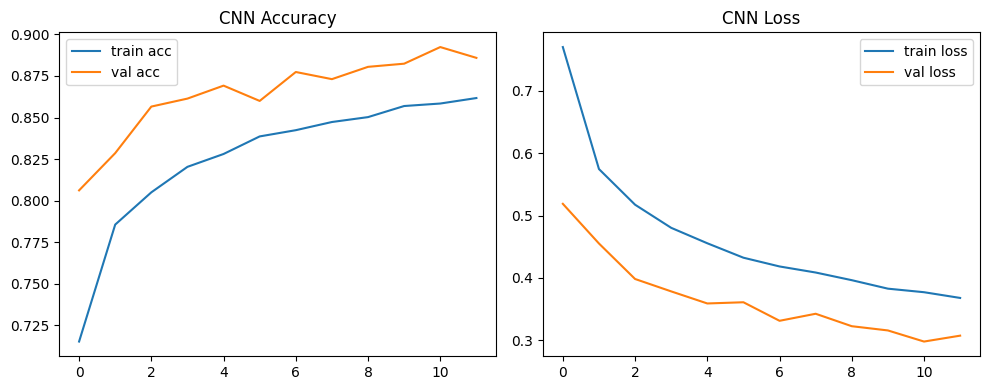

In [7]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.legend(); plt.title("CNN Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.legend(); plt.title("CNN Loss")

plt.tight_layout()
plt.show()

In [9]:
import json, os

os.makedirs("../results", exist_ok=True)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
with open("../results/metrics_cnn.json","w") as f:
    json.dump({"loss": float(test_loss), "acc": float(test_acc)}, f, indent=2)

print("CNN metrics saved")

CNN metrics saved
